In [1]:
import numpy as np
from numpy import argsort
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import os
import math
import pickle
import joblib
from itertools import chain
import glob
import seaborn as sns
import matplotlib.font_manager as font_manager
import seaborn as sns
import matplotlib as mpl
from pytorch_tabnet.tab_model import TabNetRegressor
import torch
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.utils import shuffle
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')
register_matplotlib_converters()
sns.set_theme()
mpl.matplotlib_fname()
font_dirs = ['D:\\Software\\Anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf' ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
mpl.font_manager._rebuild()
result = font_manager.findfont("Rounded Mplus 1c")
print(result)
mpl.rc('font', family='Rounded Mplus 1c')


## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

le = LabelEncoder()
ss = StandardScaler()
mms = MinMaxScaler()

D:\Software\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\MPLUSRounded1c-Regular.ttf


In [19]:
def line_plot(x , y,data, rotate,hue = None):
    plt.figure(figsize=(12,8))
    sns.lineplot(x = x, y = y, hue = hue, data = data)
    if rotate == True:
        plt.xticks(rotation = 'vertical')

def box_plot(x, y, data,  rotate,hue = None):
    plt.figure(figsize=(12,8))
    sns.boxplot(x = x, y = y, hue = hue, data = data)
    if rotate == True:
        plt.xticks(rotation = 'vertical')
        
def scatter_plot(x, y, data,  rotate,hue = None):
    plt.figure(figsize=(12,8))
    sns.scatterplot(x = x, y = y, hue = hue, data = data)
    if rotate == True:
        plt.xticks(rotation = 'vertical')
        
def bar_plot(x, y, data, rotate, hue = None):
    plt.figure(figsize=(15,14))
    sns.barplot(x = x, y = y, hue = hue, data = data)
    if rotate == True:
        plt.xticks(rotation = 'vertical')

In [3]:
df_log = pd.read_csv("log_2022-02-25 065341_gazeMapData.csv",index_col=False)
df_map =  pd.read_csv("sampleGazeMap.csv",index_col=False)
df_vector =  pd.read_csv("sampleGazeVector.csv",index_col=False)

In [6]:
df_map
df_vector
df_log

,time,xpos,ypos
0,0.000,-217.7702,63.07257
1,0.000,-214.6383,63.15460
2,0.000,-213.5483,63.26395
3,0.000,-216.2114,63.21179
4,0.000,-216.2433,63.27982
...,...,...,...
161404,1965.111,-233.5775,23.81766
161405,1965.132,-233.6835,23.47253
161406,1965.132,-241.6615,21.78204
161407,1965.155,-241.6476,21.57248


,time,gazeRightVec.x,gazeRightVec.y,gazeRightVec.z,gazeLeftVec.x,gazeLeftVec.y,gazeLeftVec.z
0,0.000,-0.109207,0.039459,0.993225,-0.024521,0.037766,0.998978
1,0.000,-0.108490,0.039642,0.993301,-0.024353,0.037674,0.998978
2,0.000,-0.108078,0.039291,0.993362,-0.023560,0.037262,0.999023
3,0.000,-0.108078,0.039291,0.993362,-0.023560,0.037262,0.999023
4,0.000,-0.107681,0.038803,0.993424,-0.023544,0.037308,0.999023
...,...,...,...,...,...,...,...
161404,1965.111,-0.196060,-0.054276,0.979080,-0.075989,-0.045395,0.996063
161405,1965.132,-0.196930,-0.057068,0.978745,-0.075256,-0.048538,0.995972
161406,1965.132,-0.196930,-0.057068,0.978745,-0.075256,-0.048538,0.995972
161407,1965.155,-0.197449,-0.057098,0.978638,-0.075638,-0.039795,0.996338


,ElapsedTime[s],Bank,Pitch,Hdg,Altitude,Ias,Power,Cdi,Phase
0,0.016658,0.032792,0.546308,26.0636,0.461534,0.000,203.120,0,0
1,0.066909,0.123429,2.186040,104.7210,1.853820,0.000,222.781,0,0
2,0.086143,0.158121,2.813660,134.8280,2.386730,0.000,230.306,0,0
3,0.104585,0.170088,3.269070,157.3040,3.028440,0.000,238.298,0,0
4,0.119810,0.118132,3.220080,157.3040,3.937870,0.000,247.153,0,0
...,...,...,...,...,...,...,...,...,...
161404,452.377000,-108.560000,-53.858600,146.2690,3677.110000,130.604,2817.980,0,0
161405,452.377000,-108.560000,-53.858600,146.2690,3677.110000,130.604,2817.980,0,0
161406,452.377000,-108.560000,-53.858600,146.2690,3677.110000,130.604,2817.980,0,0
161407,452.377000,-108.560000,-53.858600,146.2690,3677.110000,130.604,2817.980,0,0


In [12]:
df_map.info()
print("\n")
df_vector.info()
print("\n")
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161409 entries, 0 to 161408
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    161409 non-null  float64
 1   xpos    161409 non-null  float64
 2   ypos    161409 non-null  float64
dtypes: float64(3)
memory usage: 3.7 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161409 entries, 0 to 161408
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   time            161409 non-null  float64
 1   gazeRightVec.x  161409 non-null  float64
 2   gazeRightVec.y  161409 non-null  float64
 3   gazeRightVec.z  161409 non-null  float64
 4   gazeLeftVec.x   161409 non-null  float64
 5   gazeLeftVec.y   161409 non-null  float64
 6   gazeLeftVec.z   161409 non-null  float64
dtypes: float64(7)
memory usage: 8.6 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161409 entries, 0 to 161408
Data columns (

In [10]:
df_log.drop(columns = ['Cdi','Phase'],inplace = True)

In [13]:
df_log.describe()
df_vector.describe()
df_map.describe()

,ElapsedTime[s],Bank,Pitch,Hdg,Altitude,Ias,Power
count,161409.000000,161409.000000,161409.000000,161409.000000,161409.000000,161409.000000,161409.000000
mean,414.033526,-92.383623,-45.760215,148.492262,3315.391521,120.748386,2731.815656
std,103.866316,40.222477,20.005095,21.984046,997.388559,29.450190,250.659432
min,0.016658,-179.648000,-53.858600,0.012604,0.461534,0.000000,203.120000
25%,452.377000,-108.560000,-53.858600,146.269000,3677.110000,130.604000,2817.980000
50%,452.377000,-108.560000,-53.858600,146.269000,3677.110000,130.604000,2817.980000
75%,452.377000,-108.560000,-53.858600,146.269000,3677.110000,130.604000,2817.980000
max,452.377000,178.062000,16.567600,359.827000,3961.150000,130.604000,2817.980000


,time,gazeRightVec.x,gazeRightVec.y,gazeRightVec.z,gazeLeftVec.x,gazeLeftVec.y,gazeLeftVec.z
count,161409.000000,161409.000000,161409.000000,161409.000000,161409.000000,161409.000000,161409.000000
mean,1008.454916,-0.071384,-0.187604,0.964708,0.024336,-0.191184,0.965736
std,552.010933,0.116810,0.121384,0.025513,0.119414,0.123401,0.026568
min,0.000000,-0.609558,-0.586731,0.766296,-0.626648,-0.587097,0.772049
25%,529.191500,-0.127945,-0.271240,0.951202,-0.017120,-0.276749,0.951492
50%,1007.577000,-0.083191,-0.207596,0.968201,0.018814,-0.210617,0.969986
75%,1487.260000,-0.015457,-0.124695,0.982513,0.065765,-0.128876,0.984955
max,1965.155000,0.597504,0.446655,1.000000,0.618393,0.522491,1.000000


,time,xpos,ypos
count,161409.000000,1.614090e+05,1.614090e+05
mean,1008.454916,-1.481658e+02,-1.673406e+01
std,552.010933,9.135576e+04,1.542519e+04
min,0.000000,-3.099478e+07,-2.995476e+02
25%,529.191500,-2.614850e+01,-1.514103e+02
50%,1007.577000,-2.033026e+01,-1.259229e+02
75%,1487.260000,1.681696e+01,-9.810837e+01
max,1965.155000,1.937089e+07,4.903305e+06


<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

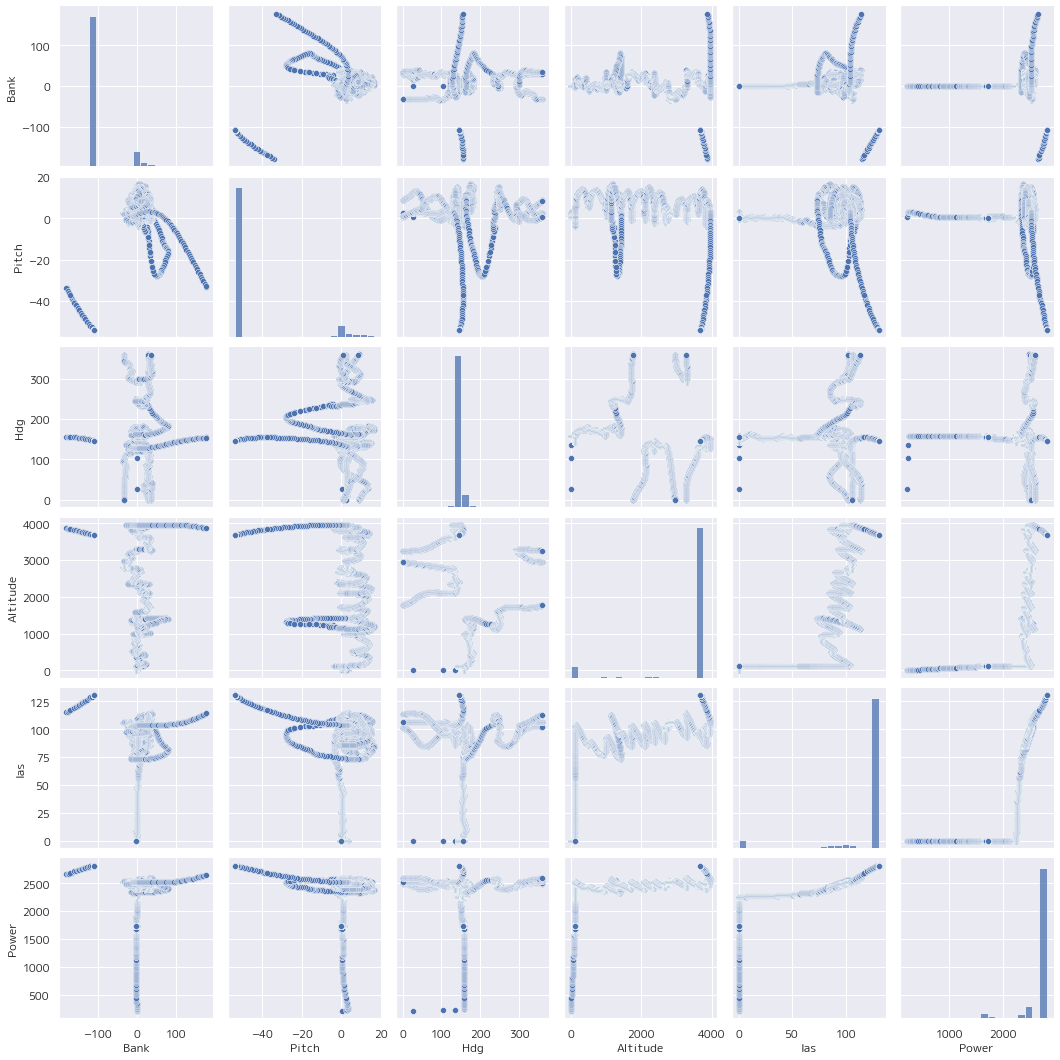

In [18]:
plt.figure(figsize = (16,12))
sns.pairplot(df_log.drop(columns = ['ElapsedTime[s]']))

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

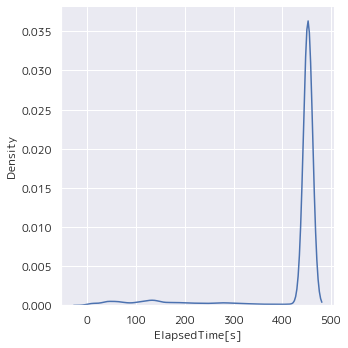

<Figure size 1152x864 with 0 Axes>

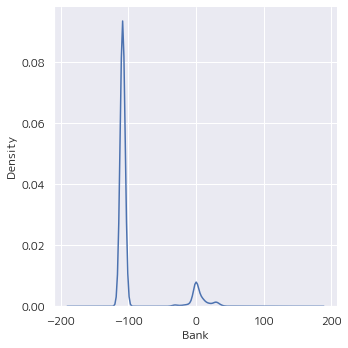

<Figure size 1152x864 with 0 Axes>

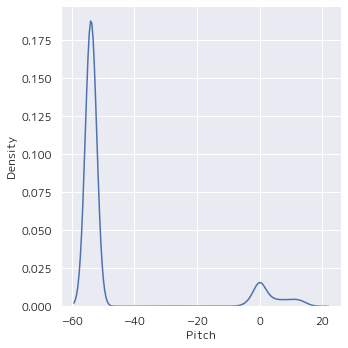

<Figure size 1152x864 with 0 Axes>

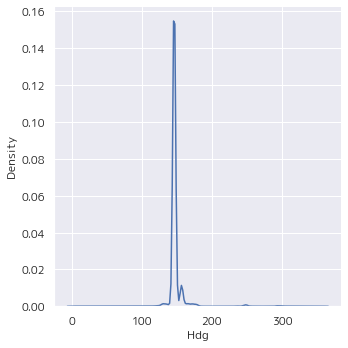

<Figure size 1152x864 with 0 Axes>

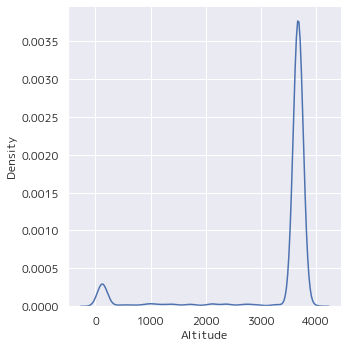

<Figure size 1152x864 with 0 Axes>

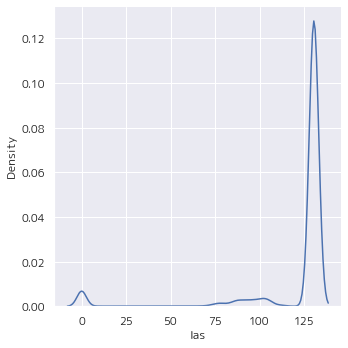

<Figure size 1152x864 with 0 Axes>

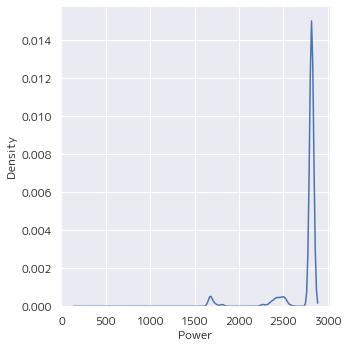

In [32]:
for col in df_log.columns:
  plt.figure(figsize = (16,12))
  sns.displot(df_log, x=col,kind = 'kde')

In [ ]:
for col in df_log.columns:
  line_plot('ElapsedTime[s]', col, df_log, False)

<Figure size 1152x864 with 0 Axes>

<AxesSubplot:>

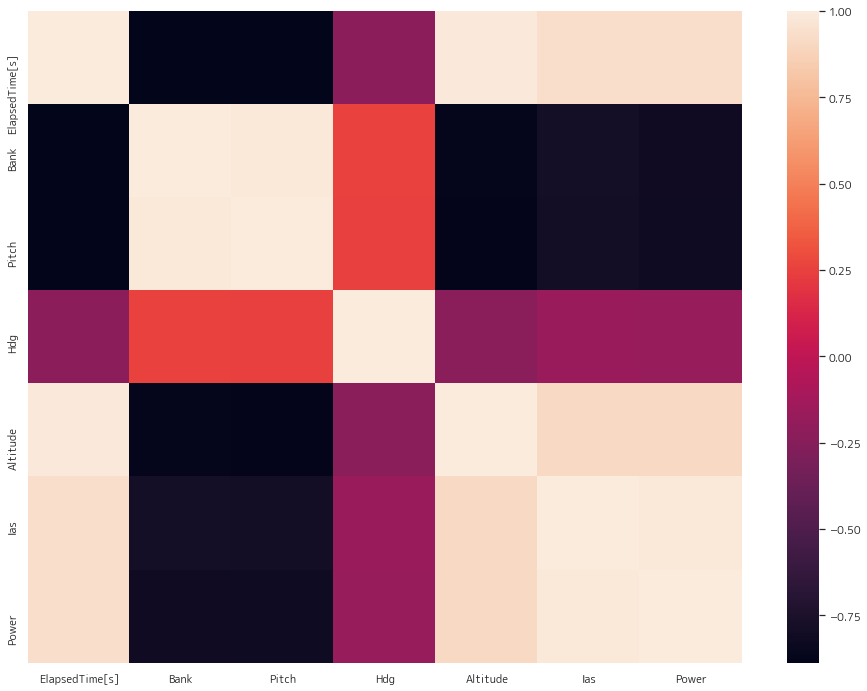

In [27]:
plt.figure(figsize = (16,12))
corr = df_log.corr()
sns.heatmap(corr)

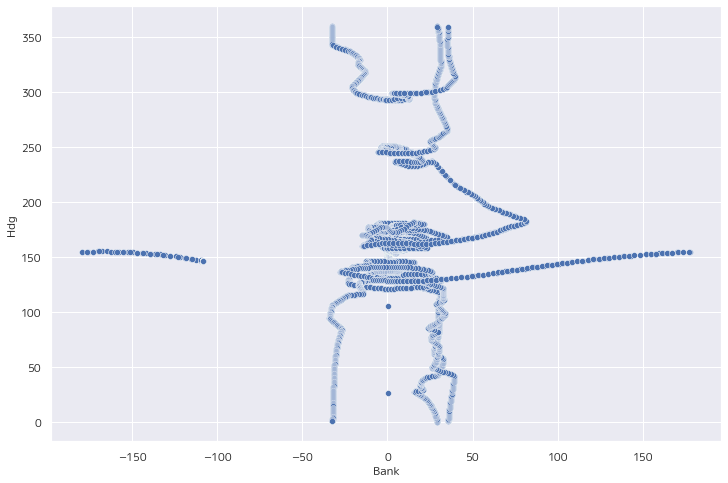

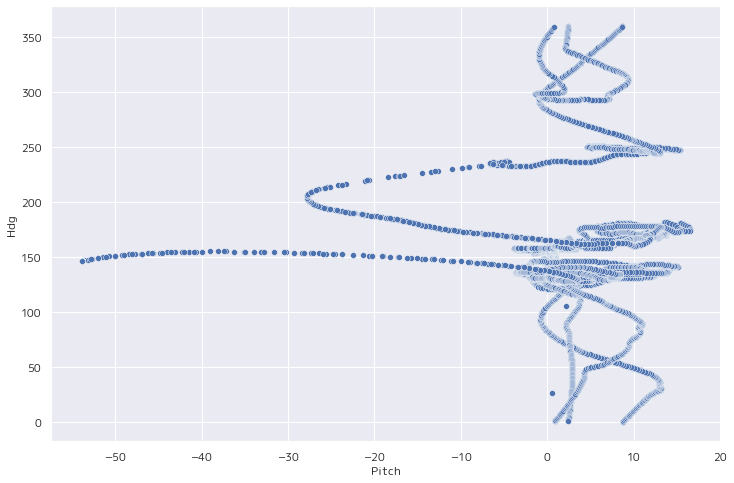

In [29]:
scatter_plot('Bank','Hdg',df_log,False)
scatter_plot('Pitch','Hdg',df_log,False)

In [ ]:
sns.displot(penguins, x="flipper_length_mm")